# Caleb Owens Notebook - Predictive ML Project

- Author: [Caleb Owens](https://github.com/CalebOwens314)
- Repository: [datafun-07-ml](https://github.com/CalebOwens314/datafun-07-ml)
- Date: 2026-02-25

In [1]:
# This is a Python cell.

# Imports at the top of the file
# REQ.EXTERNAL.DEPS: External packages must be defined in pyproject.toml
# REQ.EXTERNAL.DEPS.INSTALLED: external packages must be installed in the environment using uv sync command
# REQ.EXTERNAL.DEPS.IMPORTED: external packages used in this notebook must be imported here

print("Imports complete.")

Imports complete.


## Part 1 - Chart a Straight Line

In [2]:
%matplotlib inline


def c(f: float):
    return 5 / 9 * (f - 32)

In [3]:
temps = [(f, c(f)) for f in range(0, 101, 10)]

In [4]:
import pandas as pd

In [5]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

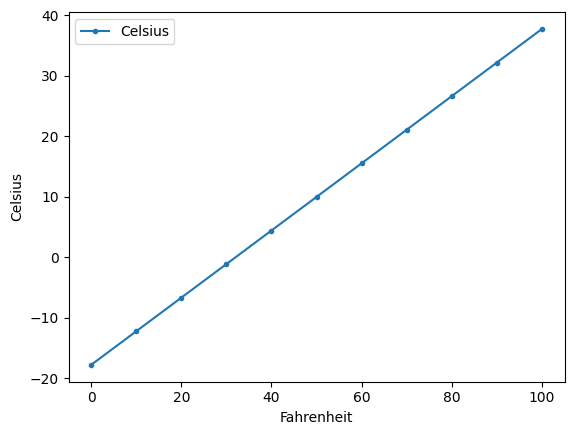

In [6]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition

In [7]:
nyc = pd.read_csv('C:\\Repos\\datafun-07-ml\\data\\raw\\ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [8]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [9]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [10]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [11]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [12]:
nyc.Date.dtype

dtype('int64')

In [13]:
nyc.Date = nyc.Date.floordiv(100)

In [14]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [15]:
pd.set_option('display.precision', 2)

In [16]:
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [17]:
from scipy import stats

In [18]:
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [19]:
linear_regression.slope

np.float64(0.014771361132966163)

In [20]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict

In [21]:
linear_regression.slope * 2019 + linear_regression.intercept

np.float64(38.51837136113297)

In [22]:
linear_regression.slope * 1850 + linear_regression.intercept

np.float64(36.022011329661694)

### Section 7 - Visualizations

In [23]:
import seaborn as sns

In [24]:
sns.set_style('whitegrid')

(10.0, 70.0)

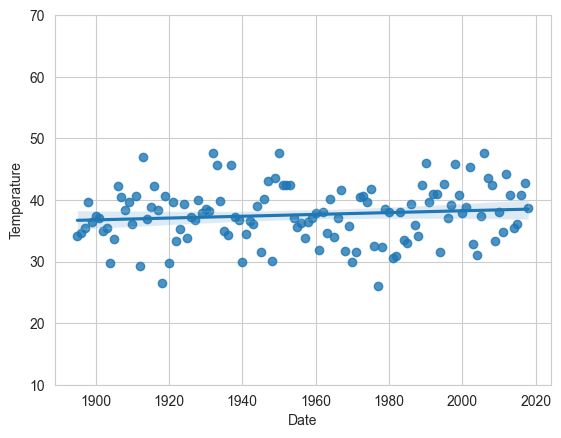

In [25]:
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

axes.set_ylim(10, 70)